In [1]:
import numpy as np 
import scipy as sp 
import pandas as pd 
from pandas import Series,DataFrame 

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline 

%precision 3 

'%.3f'

In [2]:
import requests,zipfile
from io import StringIO 
import io 

In [3]:
student_data_math = pd.read_csv('student-mat.csv',sep=';')

In [4]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
f=open('student.txt','r',encoding="utf-8")


In [7]:
for i in f:
    print(i)

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_

In [8]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

In [9]:
student_data_math.groupby('sex')['health'].mean()

sex
F    3.365385
M    3.764706
Name: health, dtype: float64

In [10]:
student_data_math.groupby('sex')['absences'].mean()

sex
F    6.216346
M    5.144385
Name: absences, dtype: float64

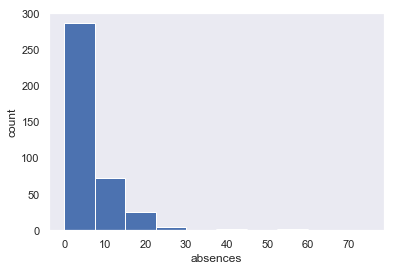

In [11]:
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid()

In [12]:
#平均値: .mean()
#中央値: .median()
#最頻値: .mode()
#分散: .var()
#標準偏差: .std()

<h2>変動係数</h2>
    <body>変動係数とは CV=σ/ x' (x': xの平均) で表されるものとし
        標準偏差を平均値で割ったもの データのスケールに関係なくデータ同士を比較したいときに用いる
</body>

In [13]:
student_data_math.std()/student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

Text(0, 0.5, 'G1 grade')

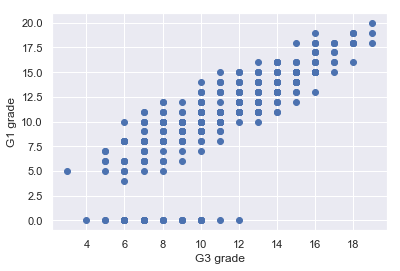

In [14]:
#散布図
plt.plot(student_data_math['G1'],student_data_math['G3'],'o')

#ラベル
plt.xlabel('G3 grade')
plt.ylabel('G1 grade')


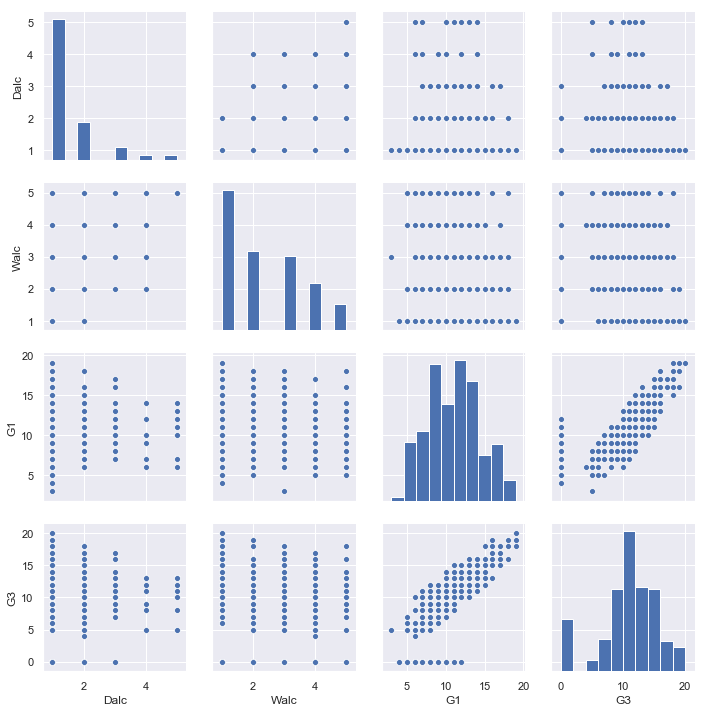

In [15]:
sns.pairplot(student_data_math[['Dalc','Walc','G1','G3']])
plt.grid(True)

In [18]:
student_data_por = pd.read_csv('student-por.csv',sep=';')
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [21]:
sutudent_data_merge = pd.merge(student_data_math,student_data_por,
                               on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'
                                                                     ],
                              suffixes=('_math','_por'))
student_data_merge.describe()

NameError: name 'student_data_merge' is not defined